Data cleaning.

In [5]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
df = pd.read_csv('Data.csv')
# top20 = df.nlargest(20,['metric_value'])
# df = df[df.metric_value > 100]
df = df[df['metric_name'].str.contains('accounts')]
df = df.groupby('metric_name').filter(lambda x: len(x) >= 1000)
count = df['metric_name'].value_counts().head(30) 
print(count)


google.accounts:num_disabled_accounts                          1577
google.accounts:num_30day_logins                               1577
google.accounts:num_locked_users                               1577
google.accounts:num_super_admins                               1577
google.accounts:total_quota_in_mb                              1577
google.accounts:num_users_used_quota_lt_50percent              1577
google.accounts:num_users_2sv_not_enrolled_but_enforced        1577
google.accounts:num_users_2sv_enrolled                         1577
google.accounts:num_suspended_users                            1577
google.accounts:num_users_2sv_not_enrolled                     1577
google.accounts:num_users_2sv_enrolled_and_enforced            1577
google.accounts:drive_used_quota_in_mb                         1577
google.accounts:num_users_2sv_enforced                         1577
google.accounts:used_quota_in_mb                               1577
google.accounts:num_users                       

In [6]:
def userDefFunction (df,name, profiling):
    df['time'] = pd.to_datetime(df['time'])
    df = df[pd.to_datetime(df['time']).dt.year == 2015]
    df = df[df.metric_name == name]
    df = df.drop(columns=['metric_name','time'])
    df = df.rename(columns={'metric_value':name})
    profiling[name] = df[name].values
    return profiling;

data = {}

profiling = pd.DataFrame(data) 
userDefFunction (df = df,name = 'google.accounts:num_1day_logins', profiling= profiling)
userDefFunction (df = df,name = 'google.accounts:num_7day_logins', profiling= profiling)
userDefFunction (df = df,name = 'google.accounts:num_30day_logins', profiling= profiling)
userDefFunction (df = df,name = 'google.accounts:gplus_photos_used_quota_in_mb', profiling= profiling)
userDefFunction (df = df,name = 'google.accounts:drive_used_quota_in_mb', profiling= profiling)
userDefFunction (df = df,name = 'google.accounts:total_quota_in_mb', profiling= profiling)
userDefFunction (df = df,name = 'google.accounts:gmail_used_quota_in_mb', profiling= profiling)
userDefFunction (df = df,name = 'google.accounts:used_quota_in_mb', profiling= profiling)
userDefFunction (df = df,name = 'google.accounts:num_disabled_accounts', profiling= profiling)
userDefFunction (df = df,name = 'google.accounts:num_suspended_users', profiling= profiling)
profiling.describe()
pandas_profiling.ProfileReport(profiling)

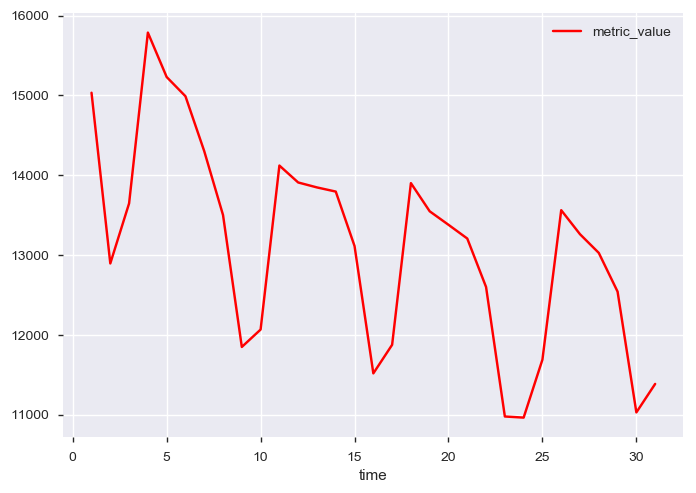

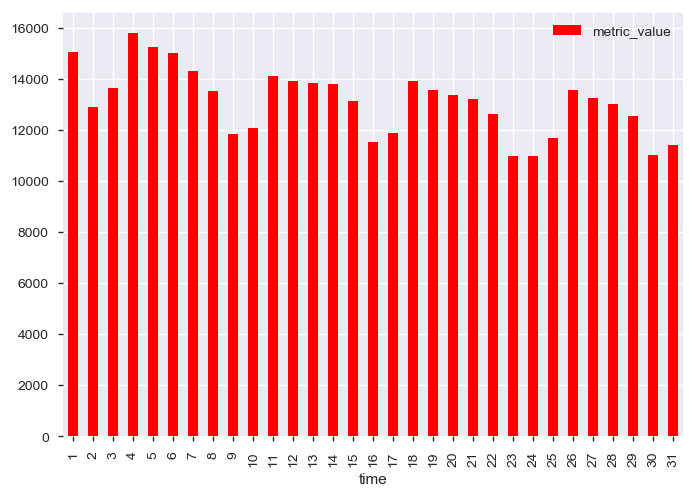

count       31.000000
mean     13115.548387
std       1295.932942
min      10965.000000
25%      11972.500000
50%      13262.000000
75%      13875.000000
max      15787.000000
Name: metric_value, dtype: float64
0.010800996310398598
-0.6062568751406414


In [11]:
df = df[df.metric_name == 'google.accounts:num_1day_logins']
df["time"] = df['time'].dt.strftime("%d").astype(int)
ax = plt.gca()
df.plot(kind='line',x='time',y='metric_value', color='red', ax=ax)
plt.show()
df.plot(kind='bar',x='time',y='metric_value',color='red')
plt.show()


print(df["metric_value"].describe())
print(df["metric_value"].skew())
print(df["metric_value"].kurt())


Function to analyze data and create line-graph/bar-graph.
Also compute 5-number summary
The function has 4 parameters: wanted metric, year, month, and data

df['time'] = pd.to_datetime(df['time'])
df = df[df.metric_value != 0]
df = df[pd.to_datetime(df['time']).dt.month == 5]
df = df[pd.to_datetime(df['time']).dt.year == 2015]
df = df[df.metric_name == 'google.accounts:drive_used_quota_in_mb']
df["time"] = df['time'].dt.strftime("%d").astype(int)
ax = plt.gca()
df.plot(kind='line',x='time',y='metric_value', color='red', ax=ax)
plt.show()
df.plot(kind='bar',x='time',y='metric_value',color='red')
plt.show()


print(df["metric_value"].describe())
print(df["metric_value"].skew())
print(df["metric_value"].kurt())

print(df)